In [2]:
import numpy as np
#data
np.random.seed(seed=1)
N=200#サンプルサイズ
K=3#分布の数
T=np.zeros((N,3),dtype=np.uint8)
X=np.zeros((N,2))
X0_min,X0_max=-3,3
X1_min,X1_max=-3,3
prm_mu=np.array([[-0.5,-0.5],[0.5,1.0],[1,-0.5]])
prm_sig=np.array([[0.7,0.7],[0.8,0.3],[0.3,0.8]])
prm_pi=np.array([0.4,0.8,1])
for n in range(N):
    r=np.random.rand()
    for k in range(K):
        if r<prm_pi[k]:
            T[n,k]=1
            break
    for k in range(2):
        X[n,k]=np.random.randn()*prm_sig[T[n,:]==1,k]+prm_mu[T[n,:]==1,k]
        print(X[n,k])


-0.14173827091891422
0.8653366576837682
-0.8697202265844189
-1.2510780355093192
-2.154428023346008
0.29474174353009697
0.7552312768456788
0.925188887356777
-1.1019346247138375
0.7408253405557994
0.24206623678919398
0.8847836935994753
1.2189926789241534
-0.2016049687496675
0.9482715377348693
-1.2022867343370973
1.5741461162707133
-0.23536229627768696
0.13111350441495684
-0.14825396276869224
-1.0950366640352582
0.17257400286501723
0.4016878195850815
0.7192691697222794
0.688588370637155
-1.3075838614202528
-0.9810208900837196
-1.0916439490491037
0.5825303971519754
0.8134999456788625
0.6618615239769092
0.01943091240413486
0.684278289301216
-1.0235676190307847
0.5406462038208232
0.808901306029194
1.04670738447575
1.00686579244431
0.740136255964662
0.8943250460519444
0.3738098511242446
-1.0303718989972075
0.728469860203407
1.2655423492812183
-0.5332501622387558
0.7455268254858054
1.146555443961249
-0.5604573704168446
-0.20438143699962452
1.0834386537125327
1.6556726219599485
-1.6171970683905

In [3]:
#訓練データとテストデータ
TrainingRatio=0.5
N_training=int(N*TrainingRatio)
X_train=X[:N_training,:]
X_test=X[N_training:,:]
T_train=T[:N_training,:]
T_test=T[N_training:,:]
#save data
np.savez(
    "Ch7_data.npz",
    X_train=X_train,T_train=T_train,X_test=X_test,T_test=T_test,
    X0_min=X0_min,X0_max=X0_max,X1_min=X1_min,X1_max=X1_max,
)

In [4]:
print(T)

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 

In [5]:
print(X)

[[-1.41738271e-01  8.65336658e-01]
 [-8.69720227e-01 -1.25107804e+00]
 [-2.15442802e+00  2.94741744e-01]
 [ 7.55231277e-01  9.25188887e-01]
 [-1.10193462e+00  7.40825341e-01]
 [ 2.42066237e-01  8.84783694e-01]
 [ 1.21899268e+00 -2.01604969e-01]
 [ 9.48271538e-01 -1.20228673e+00]
 [ 1.57414612e+00 -2.35362296e-01]
 [ 1.31113504e-01 -1.48253963e-01]
 [-1.09503666e+00  1.72574003e-01]
 [ 4.01687820e-01  7.19269170e-01]
 [ 6.88588371e-01 -1.30758386e+00]
 [-9.81020890e-01 -1.09164395e+00]
 [ 5.82530397e-01  8.13499946e-01]
 [ 6.61861524e-01  1.94309124e-02]
 [ 6.84278289e-01 -1.02356762e+00]
 [ 5.40646204e-01  8.08901306e-01]
 [ 1.04670738e+00  1.00686579e+00]
 [ 7.40136256e-01  8.94325046e-01]
 [ 3.73809851e-01 -1.03037190e+00]
 [ 7.28469860e-01  1.26554235e+00]
 [-5.33250162e-01  7.45526825e-01]
 [ 1.14655544e+00 -5.60457370e-01]
 [-2.04381437e-01  1.08343865e+00]
 [ 1.65567262e+00 -1.61719707e+00]
 [ 7.60045942e-01  9.36426123e-01]
 [ 7.52507958e-01  3.93339635e-01]
 [ 1.21527695e+00 -7

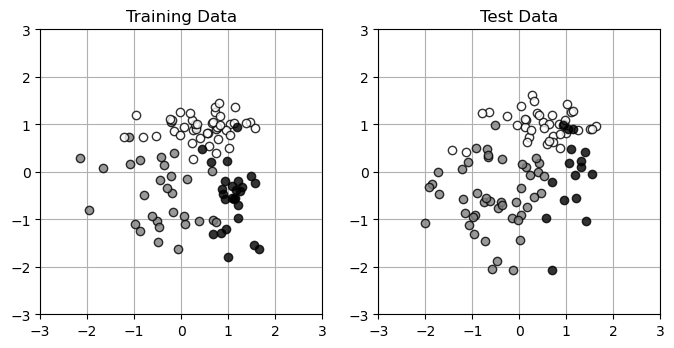

In [6]:
import matplotlib.pyplot as plt
#data
def show_data(x,t):
    K=t.shape[1]
    col=["gray","white","black"]
    for k in range(K):
        plt.plot(
            x[t[:,k]==1,0],x[t[:,k]==1,1],col[k],
            marker="o",linestyle="None",
            markeredgecolor="black",alpha=0.8,
        )
    plt.xlim(X0_min,X0_max)
    plt.ylim(X1_min,X1_max)
#main
plt.figure(figsize=(8,3.7))
plt.subplot(1,2,1)
show_data(X_train,T_train)
plt.title("Training Data")
plt.grid()
#test
plt.subplot(1,2,2)
show_data(X_test,T_test)
plt.title("Test Data")
plt.grid()
plt.show()

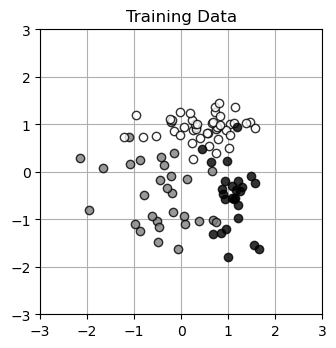

In [7]:
import matplotlib.pyplot as plt
#data
def show_data(x,t):
    K=t.shape[1]
    col=["gray","white","black"]
    plt.plot(x[t[:,0]==1,0],x[t[:,0]==1,1],col[0],
             x[t[:,1]==1,0],x[t[:,1]==1,1],col[1],
             x[t[:,2]==1,0],x[t[:,2]==1,1],col[2],
             marker="o",linestyle="None",markeredgecolor="black",alpha=0.8,
    )
    plt.xlim(X0_min,X0_max)
    plt.ylim(X1_min,X1_max)
#main
plt.figure(figsize=(8,3.7))
plt.subplot(1,2,1)
show_data(X_train,T_train)
plt.title("Training Data")
plt.grid()

In [8]:
print(X)

[[-1.41738271e-01  8.65336658e-01]
 [-8.69720227e-01 -1.25107804e+00]
 [-2.15442802e+00  2.94741744e-01]
 [ 7.55231277e-01  9.25188887e-01]
 [-1.10193462e+00  7.40825341e-01]
 [ 2.42066237e-01  8.84783694e-01]
 [ 1.21899268e+00 -2.01604969e-01]
 [ 9.48271538e-01 -1.20228673e+00]
 [ 1.57414612e+00 -2.35362296e-01]
 [ 1.31113504e-01 -1.48253963e-01]
 [-1.09503666e+00  1.72574003e-01]
 [ 4.01687820e-01  7.19269170e-01]
 [ 6.88588371e-01 -1.30758386e+00]
 [-9.81020890e-01 -1.09164395e+00]
 [ 5.82530397e-01  8.13499946e-01]
 [ 6.61861524e-01  1.94309124e-02]
 [ 6.84278289e-01 -1.02356762e+00]
 [ 5.40646204e-01  8.08901306e-01]
 [ 1.04670738e+00  1.00686579e+00]
 [ 7.40136256e-01  8.94325046e-01]
 [ 3.73809851e-01 -1.03037190e+00]
 [ 7.28469860e-01  1.26554235e+00]
 [-5.33250162e-01  7.45526825e-01]
 [ 1.14655544e+00 -5.60457370e-01]
 [-2.04381437e-01  1.08343865e+00]
 [ 1.65567262e+00 -1.61719707e+00]
 [ 7.60045942e-01  9.36426123e-01]
 [ 7.52507958e-01  3.93339635e-01]
 [ 1.21527695e+00 -7

In [9]:
#sigmoid function
def sigmoid(a):
    y=1/(1+np.exp(-a))
    return y
#network
def FNN(wv,M,K,x):
    N,D=x.shape#入力次元
    w=wv[:M*(D+1)]#中間層のニューロンの重み（ニューロンは入力値？）
    w=w.reshape(M,(D+1))
    v=wv[M*(D+1):]#出力層のニューロンの重み
    v=v.reshape((K,M+1))
    b=np.zeros((N,M+1))#中間層ニューロンの入力総和
    z=np.zeros((N,M+1))#中間層ニューロンの出力
    a=np.zeros((N,K))#出力層ニューロンの入力総和
    y=np.zeros((N,K))#出力層ニューロンの出力
    for n in range(N):
        for m in range(M):
            x_add1=np.r_[x[n,:],1]
            b[n,m]=w[m,:]@x_add1
            z[n,m]=sigmoid(b[n,m])
        z[n,M]=1#ダミーニューロン
        u=0
        for k in range(K):
            a[n,k]=v[k,:]@z[n,:]#行列の積という名前のベクトル積？
            u=u+np.exp(a[n,k])
        for k in range(K):
            y[n,k]=np.exp(a[n,k])/u
    return y,a,z,b
#test
wv=np.ones(15)
M,K=2,3
y,a,z,b=FNN(wv,M,K,X_train[:2,:])
print("y=\n",np.round(y,6))
print("a=\n",np.round(a,6))
print("z=\n",np.round(z,6))
print("b=\n",np.round(b,6))
        

y=
 [[0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]]
a=
 [[2.697184 2.697184 2.697184]
 [1.491726 1.491726 1.491726]]
z=
 [[0.848592 0.848592 1.      ]
 [0.245863 0.245863 1.      ]]
b=
 [[ 1.723598  1.723598  0.      ]
 [-1.120798 -1.120798  0.      ]]


In [10]:
#平均交差エントロピー誤差
#最尤法の逆
def cee_FNN(wv,M,K,x,t):
    N,D=x.shape
    y,a,z,b=FNN(wv,M,K,x)
    cee=-(t.reshape(-1)@np.log(y.reshape(-1)))/N#１行のベクトル同士の積
    return cee
#test
wv=np.ones(15)
M,K=2,3
cee=cee_FNN(wv,M,K,X_train[:2,:],T_train[:2,:])
print(f"cee={cee:.6}")

cee=1.09861


numerical dwv
dwv=
 [ 0.088481  0.19158  -0.051398  0.012815 -0.14468  -0.142428 -0.02992
  0.013513 -0.111156 -0.101044 -0.09428  -0.468556  0.130964  0.080766
  0.579713]


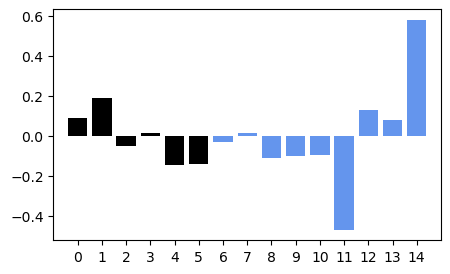

In [11]:
#平均エントロピー誤差の数値微分
def dcee_FNN_num(wv,M,K,x,t):
    epsilon=0.001
    dwv=np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_shifted=wv.copy()
        wv_shifted[iwv]=wv[iwv]+epsilon
        mse1=cee_FNN(wv_shifted,M,K,x,t)
        wv_shifted[iwv]=wv[iwv]-epsilon
        mse2=cee_FNN(wv_shifted,M,K,x,t)
        dwv[iwv]=(mse1-mse2)/(2*epsilon)
    return dwv
#dwvの棒グラフによる表示
def show_dwv(dwv,D,M):
    v_start=M*(D+1)
    v_end=dwv.shape[0]-1
    plt.bar(
        range(0,v_start),dwv[:v_start],
        color="black",align="center",
    )
    plt.bar(
        range(v_start,v_end+1),dwv[v_start:],
        color="cornflowerblue",align="center",
    )
    plt.xticks(range(0,v_end+1))
    plt.xlim(-1,v_end+1)
#test
D,M,K,N=2,2,3,2
wv_n=M*(D+1)+K*(M+1)
np.random.seed(seed=1)
wv=np.random.normal(
    0.0,1.0,wv_n
    )
dwv=dcee_FNN_num(
    wv,M,K,X_train[:N,:],T_train[:N,:])
print("numerical dwv")
print("dwv=\n",np.round(dwv,6))
plt.figure(figsize=(5,3))
show_dwv(dwv,D,M)
plt.show()

In [12]:
wv

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944])

In [13]:
import time
#数値微分法を使った勾配法numeric differential
def fit_FNN_num(
        wv_init,M,K,
        x_train,t_train,x_test,t_test,
        tau_max,alpha,
):
    #log of training eror
    cee_train=np.zeros(tau_max)
    #log of testing error
    cee_test=np.zeros(tau_max)
    #log of wv
    wv=np.zeros((tau_max,len(wv_init)))
    #set wv's initialvalue and calculate that error
    wv[0,:]=wv_init
    cee_train[0]=cee_FNN(wv_init,M,K,x_train,t_train)
    #↑cee_FNN is written in ｐ282
    cee_test[0]=cee_FNN(wv_init,M,K,x_test,t_test)
    #gradient method
    #more smaller number more better
    for tau in range(tau_max-1):
        dcee=dcee_FNN_num(wv[tau,:],M,K,x_train,t_train)
        wv[tau+1,:]=wv[tau,:]-alpha*dcee
        cee_train[tau+1]=\
            cee_FNN(wv[tau+1,:],M,K,x_train,t_train)
        cee_test[tau+1]=\
            cee_FNN(wv[tau+1,:],M,K,x_test,t_test)
    wv_final=wv[-1,:]
    return wv_final,wv,cee_train,cee_test
#main
start_time=time.time()
D,M,K=2,2,3
wv_n=M*(D+1)+K*(M+1)
np.random.seed(seed=1)
wv_init=np.random.normal(0,0.01,wv_n)
tau_max=1000
alpha=0.5
#calculate wv by gradienting method
wv,wv_hist,cee_train,cee_test=\
    fit_FNN_num(
        wv_init,M,K,
        X_train,T_train,X_test,T_test,
        tau_max,alpha,
    )
#express calculation time
calculation_time=time.time()-start_time
print(f"Calculation time:{calculation_time:.2f}sec")

Calculation time:160.08sec


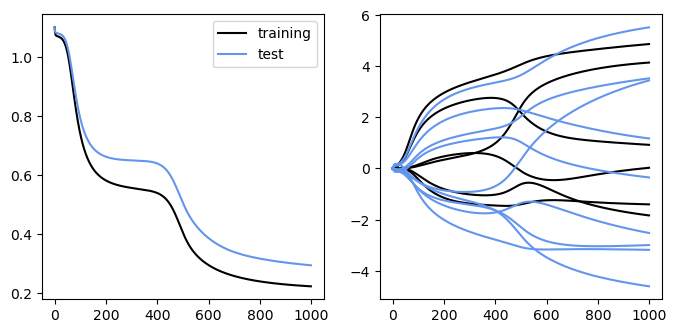

In [14]:
#express learning error
plt.figure(figsize=(8,3.7))
plt.subplot(1,2,1)
plt.plot(cee_train,"black",label="training")
plt.plot(cee_test,"cornflowerblue",label="test")
plt.legend()
plt.subplot(1,2,2)
v_start=M*(D+1)
plt.plot(wv_hist[:,:v_start],"black",label="w")
plt.plot(wv_hist[:,v_start:],"cornflowerblue",label="v")
plt.show()

In [15]:
x0_n,x1_n=60,60
x0=np.linspace(X0_min,X0_max,x0_n)
x1=np.linspace(X1_min,X1_max,x1_n)
xx0,xx1=np.meshgrid(x0,x1)
    #xx0とxx1を１次元ベクトルに展開し
    #それぞれを0列目と１行目に配置した行列ｘをつくる
x=np.c_[xx0.reshape(-1),xx1.reshape(-1)]
x

array([[-3.        , -3.        ],
       [-2.89830508, -3.        ],
       [-2.79661017, -3.        ],
       ...,
       [ 2.79661017,  3.        ],
       [ 2.89830508,  3.        ],
       [ 3.        ,  3.        ]])

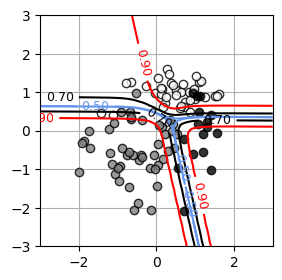

In [16]:
#Boundary display function(境界表示関数)
def show_FNN(wv,M,K):
    x0_n,x1_n=60,60
    x0=np.linspace(X0_min,X0_max,x0_n)
    x1=np.linspace(X1_min,X1_max,x1_n)
    xx0,xx1=np.meshgrid(x0,x1)
    #xx0とxx1を１次元ベクトルに展開し
    #それぞれを0列目と１行目に配置した行列ｘをつくる
    x=np.c_[xx0.reshape(-1),xx1.reshape(-1)]
    #行列xに対するyを一度にもとめる
    y,a,z,b=FNN(wv,M,K,x)#p280
    for ic in range(K):
        f=y[:,ic]
        f=f.reshape(x1_n,x0_n)
        cont=plt.contour(
            xx0,xx1,f,
            levels=[0.5,0.7,0.9],colors=["cornflowerblue","black","red"],
        )
        cont.clabel(fmt="%.2f",fontsize=9)
    plt.xlim(X0_min,X0_max)
    plt.ylim(X1_min,X1_max)
#express boundary(境境界線の表示）
plt.figure(figsize=(3,3))
show_data(X_test,T_test)
show_FNN(wv,M,K)
plt.grid()
plt.show()

頭がもやもやする理由はｗとｖを入力する関数なのに右辺にwとvが書いてないことだとおもった

analytical dwv
dwv=
 [ 0.088481  0.19158  -0.051398  0.012815 -0.14468  -0.142428 -0.02992
  0.013513 -0.111156 -0.101044 -0.09428  -0.468556  0.130964  0.080766
  0.579713]
numerical dwv
dwv=
 [ 0.088481  0.19158  -0.051398  0.012815 -0.14468  -0.142428 -0.02992
  0.013513 -0.111156 -0.101044 -0.09428  -0.468556  0.130964  0.080766
  0.579713]


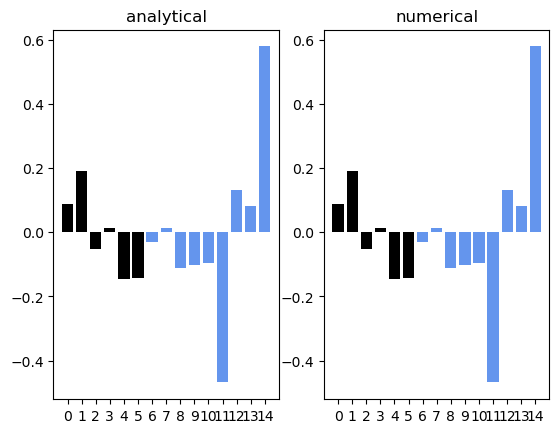

In [17]:
#解析的微分
def dcee_FNN(wv,M,K,x,t):
    N,D=x.shape
    #wvをwとvに戻す
    v_start=M*(D+1)
    w=wv[:v_start]
    w=w.reshape(M,D+1)
    v=wv[v_start:]
    v=v.reshape(K,M+1)
    #①入力ｘを入れて出力yを得る
    y,a,z,b=FNN(wv,M,K,x)#p280に掲載
    #出力変数の準備
    dwv=np.zeros_like(wv)
    dw=np.zeros((M,D+1))
    dv=np.zeros((K,M+1))
    delta1=np.zeros(M)#1層目誤差
    delta2=np.zeros(K)#2層目誤差(k=0使用せず)
    for n in range(N):
        for k in range(K):
            #②2層の誤差を得る
            delta2[k]=y[n,k]-t[n,k]
        for j in range(M):
            #③1層の誤差を得る
            delta1[j]=z[n,j]*(1-z[n,j])*v[:,j]@delta2
            #z[n,j]微分⇒z[n,j]*(1-z[n,j])
        for k in range(K):
            #vの更新分を得る
            dv[k,:]=dv[k,:]+delta2[k]*z[n,:]/N
        for j in range(M):
            #wの更新分を得る
            x_add1=np.r_[x[n,:],1]
            dw[j,:]=dw[j,:]+delta1[j]*x_add1/N
            #↑ダミーニューロンを忘れずに
    #dw+dv=dwv
    dwv=np.c_[
        dw.reshape((1,M*(D+1))),
        dv.reshape((1,K*(M+1))),
    ]
    dwv=dwv.reshape(-1)
    return dwv

#test
D,M,K,N=2,2,3,2
wv_n=M*(D+1)+K*(M+1)
np.random.seed(seed=1)
wv=np.random.normal(0.0,1.0,wv_n)
dwv_ana=dcee_FNN(wv,M,K,X_train[:N,:],T_train[:N,:])#誤差伝搬法
dwv_num=dcee_FNN_num(wv,M,K,X_train[:N,:],T_train[:N,:])#数値微分
#結果表示
print("analytical dwv")
print("dwv=\n",np.round(dwv_ana,6))
print("numerical dwv")
print("dwv=\n",np.round(dwv_num,6))
#analytical calculate
plt.subplot(1,2,1)
show_dwv(dwv_ana,D,M)
plt.title("analytical")
#numberical calculate
plt.subplot(1,2,2)
show_dwv(dwv_num,D,M)
plt.title("numerical")
plt.show()


7月11日

In [18]:

#gradient method to use analitic differential
def fit_FNN(
        wv_init,M,K,
        x_train,t_train,x_test,t_test,
        tau_max,alpha,
):
    #log:error of training data
    cee_train=np.zeros(tau_max)
    #log:error of test data
    cee_test=np.zeros(tau_max)
    #wv log
    wv=np.zeros((tau_max,len(wv_init)))
    #calculate initial value of wv and error of wv
    wv[0,:]=wv_init
    cee_train[0]=cee_FNN(wv_init,M,K,x_train,t_train)
    cee_test[0]=cee_FNN(wv_init,M,K,x_test,t_test)
#勾配法
    for tau in range(tau_max-1):
        dcee=dcee_FNN(wv[tau,:],M,K,x_train,t_train)
        wv[tau+1,:]=wv[tau,:]-alpha*dcee
        cee_train[tau+1]=\
            cee_FNN(wv[tau+1,:],M,K,x_train,t_train)
        cee_test[tau+1]=\
            cee_FNN(wv[tau+1,:],M,K,x_test,t_test)
    wv_final=wv[-1,:]
    return wv_final,wv,cee_train,cee_test
#main
start_time=time.time()
D,M,K=2,2,3 
wv_n=M*(D+1)+K*(M+1)   
np.random.seed(seed=1)
wv_init=np.random.normal(0,0.01,wv_n)
tau_max=1000#学習ステップ
alpha=0.5
#wv are calculated by gradient method
wv,wv_hist,cee_train,cee_test=\
    fit_FNN(
        wv_init,M,K,
        X_train,T_train,X_test,T_test,
        tau_max,alpha,
    )
#計算時間の表示
calculation_time=time.time()-start_time
print(f"Calculation time:{calculation_time:.2f}sec")

Calculation time:19.06sec


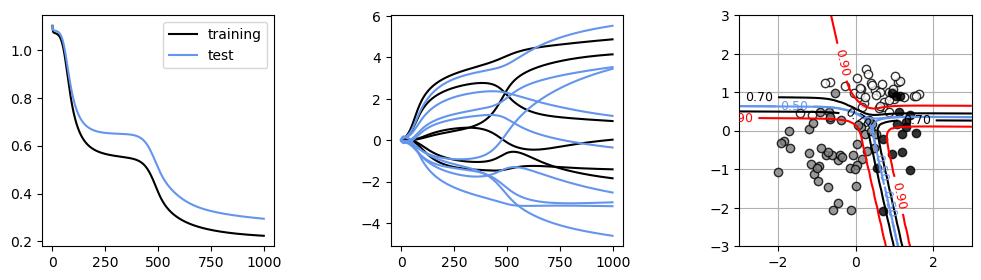

In [19]:
import matplotlib.pyplot as plt
D,M,K=2,2,3
plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.5)
#学習誤差の表示
plt.subplot(1,3,1)
plt.plot(cee_train,"black",label="training")
plt.plot(cee_test,"cornflowerblue",label="test")
plt.legend()
#重みの時間発展の表示
plt.subplot(1,3,2)
v_start=M*(D+1)
plt.plot(wv_hist[:,:v_start],"black")
plt.plot(wv_hist[:,v_start:],"cornflowerblue")
#境界線の表示
plt.subplot(1,3,3)
show_data(X_test,T_test)
show_FNN(wv,M,K)
plt.grid()
plt.show()

C:\Users\kutak\AppData\Local\Temp\ipykernel_21420\3013816073.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(f_ticks)


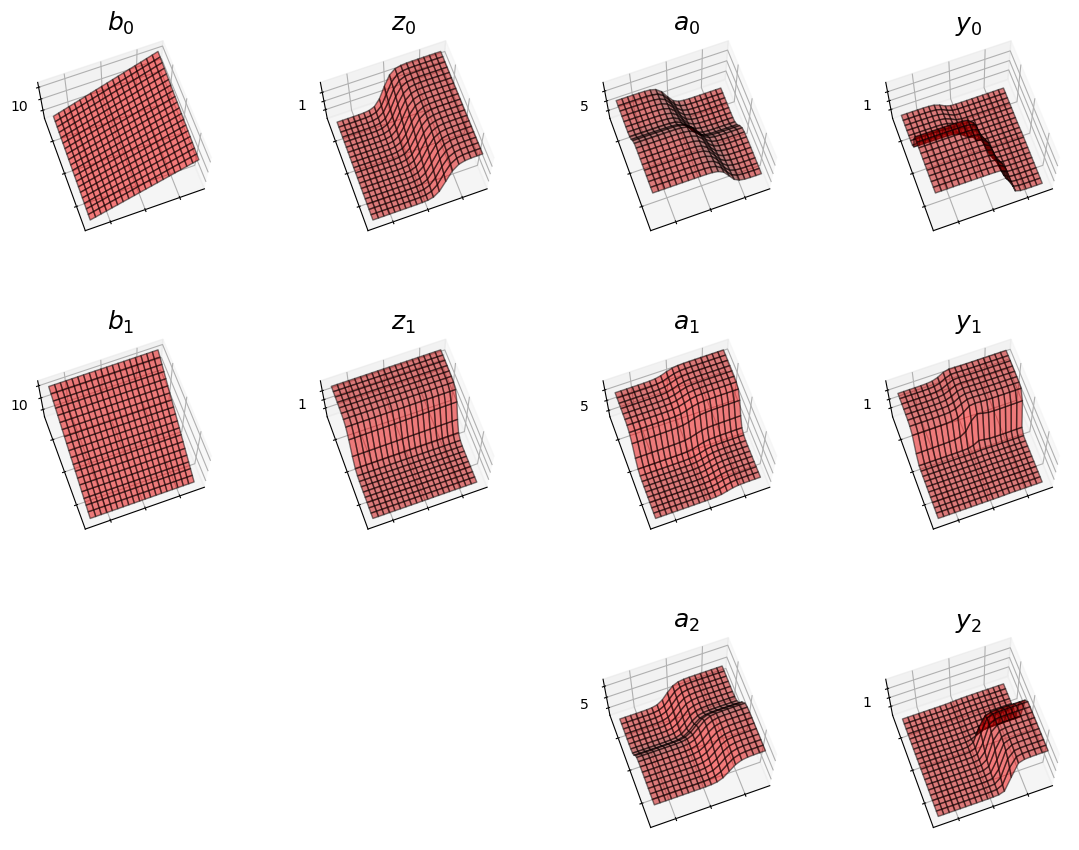

In [23]:
#サーフェス表示関数
def show_activation3d(ax,xx0,xx1,f,f_ticks,title):
    x1_n,x0_n=xx0.shape
    f=f.reshape(x1_n,x0_n)
    ax.plot_surface(
        xx0,xx1,f,
        rstride=1,cstride=1,alpha=0.5,color="red",edgecolor="black",
    )
    ax.view_init(70,-110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels(f_ticks)
    ax.set_title(title,fontsize=18)
#main
M,K=2,3
x0_n,x1_n=20,20#等高線表示の解像度
x0=np.linspace(X0_min,X0_max,x0_n)
x1=np.linspace(X1_min,X1_max,x1_n)
xx0,xx1=np.meshgrid(x0,x1)
x=np.c_[xx0.reshape(-1),xx1.reshape(-1)]
y,a,z,b=FNN(wv,M,K,x)
#グラフ表示
fig=plt.figure(figsize=(12,9))
plt.subplots_adjust(
    left=0.075,bottom=0.05,right=0.95,top=0.95,
    wspace=0.4,hspace=0.4,
)
#b,zの表示
for m in range(M):
    ax=fig.add_subplot(3,4,1+m*4,projection="3d")
    show_activation3d(ax,xx0,xx1,b[:,m],[-10,10],f"$b_{m:d}$")
    ax=fig.add_subplot(3,4,2+m*4,projection="3d")
    show_activation3d(ax,xx0,xx1,z[:,m],[0,1],f"$z_{m:d}$")
#a,yの表示
for k in range(K):
    ax=fig.add_subplot(3,4,3+k*4,projection="3d")
    show_activation3d(ax,xx0,xx1,a[:,k],[-5,5],f"$a_{k:d}$")
    ax=fig.add_subplot(3,4,4+k*4,projection="3d")
    show_activation3d(ax,xx0,xx1,y[:,k],[0,1],f"$y_{k:d}$")